ANTIKYTHERA PLAYGROUND DATATHON 2024

In [ ]:
pip install numpy
pip install matplotlib
pip install pandas
pip install seaborn

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

test_df  = pd.read_csv("test.csv")
ip_address_mapping_df  = pd.read_csv("ip_address_mapping.csv")

In [13]:
ip_address_mapping_df['batas_bawah_alamat_IP'] = pd.to_numeric(ip_address_mapping_df['batas_bawah_alamat_IP'])
ip_address_mapping_df['batas_atas_alamat_IP'] = pd.to_numeric(ip_address_mapping_df['batas_atas_alamat_IP'])

def map_ip_to_country(ip):
    row = ip_address_mapping_df[(ip_address_mapping_df['batas_bawah_alamat_IP'] <= ip) & 
                                (ip_address_mapping_df['batas_atas_alamat_IP'] >= ip)]
    if not row.empty:
        return row['negara'].values[0]
    else:
        return np.nan
    
test_df['negara'] = test_df['alamat_IP'].apply(map_ip_to_country)

test_df.head()


,id_pengguna,waktu_pendaftaran_akun,waktu_pembelian,total_harga_pembelian,id_perangkat,sumber,browser,gender,umur,alamat_IP,negara
0,28006,2015-06-26 13:27:55,2015-07-13 02:46:13,48,IVHYUSXPDUJUD,SEO,Chrome,M,31,4.268419e+09,NaN
1,245189,2015-06-23 15:48:00,2015-09-16 07:26:25,46,UJURCZHQSNBQA,SEO,Firefox,M,34,4.277726e+09,NaN
2,58345,2015-06-18 04:14:35,2015-09-21 22:24:59,30,PVWDQUCMMBJXJ,Iklan,Firefox,F,20,1.235071e+09,United States
3,218574,2015-05-19 14:55:18,2015-08-21 00:44:36,29,PMSPHBOFWBTRC,Langsung,Safari,M,25,2.496396e+09,Mexico
4,49779,2015-04-02 23:35:29,2015-07-08 06:24:47,19,NFGHLAQQPTLVY,Iklan,Chrome,M,38,2.701254e+09,United States


In [14]:
cleaned_test_df = test_df.dropna(subset=['negara'])

num_rows_before = len(test_df)
num_rows_after = len(cleaned_test_df)
num_rows_before, num_rows_after

(75556, 64582)

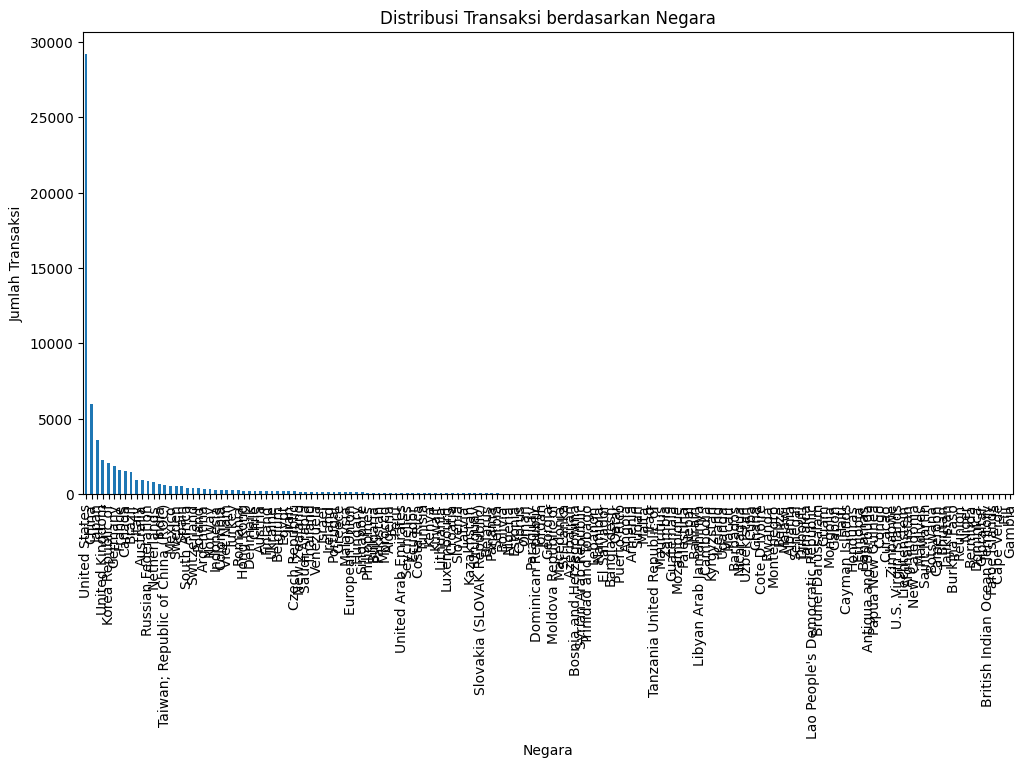

In [15]:
# Plot the distribution of transactions by country
country_distribution = cleaned_test_df['negara'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
country_distribution.plot(kind='bar')
plt.title('Distribusi Transaksi berdasarkan Negara')
plt.xlabel('Negara')
plt.ylabel('Jumlah Transaksi')
plt.show()

In [22]:
# Menampilkan ringkasan deskriptif
lktm_summary = test_df['total_harga_pembelian'].describe()
print(lktm_summary)
print("\n")

# Menetapkan threshold berdasarkan persentil
threshold_90 = np.percentile(test_df['total_harga_pembelian'], 90)  # Ambil threshold dari persentil 90
print(f"Threshold (90th percentile): {threshold_90}")


# Menggunakan threshold ini untuk menandai transaksi mencurigakan dalam dataset utama
test_df['penipuan'] = test_df['total_harga_pembelian'] > threshold_90

# Melihat transaksi yang ditandai sebagai penipuan
penipuan_transactions = test_df[test_df['penipuan'] == True]
# print("\nTransaksi yang Ditandai sebagai Penipuan:\n", penipuan_transactions.head())

penipuan_transactions

count    75556.000000
mean        37.008338
std         18.342928
min          9.000000
25%         22.000000
50%         35.000000
75%         49.000000
max        140.000000
Name: total_harga_pembelian, dtype: float64


Threshold (90th percentile): 62.0


,id_pengguna,waktu_pendaftaran_akun,waktu_pembelian,total_harga_pembelian,id_perangkat,sumber,browser,gender,umur,alamat_IP,negara,penipuan
10,28109,2015-01-26 03:21:18,2015-02-19 20:03:07,85,HSYBNWCXSWMWD,SEO,Internet Explorer,M,25,3.356970e+09,Mexico,True
20,261717,2015-02-13 19:25:41,2015-05-09 20:01:56,73,TZAJYEFLUISOP,SEO,Chrome,M,45,2.699106e+08,United States,True
25,279431,2015-08-06 22:26:11,2015-12-03 11:32:24,76,OGADNZOAOJPZB,SEO,Chrome,M,27,2.017438e+08,United States,True
26,157045,2015-03-20 03:56:40,2015-07-07 18:37:27,63,QGFTIVRSRICCM,SEO,Internet Explorer,M,23,1.002934e+09,China,True
32,313016,2015-02-01 12:50:33,2015-04-09 14:12:55,84,CPQBGOIOBJAAE,SEO,Chrome,M,40,1.016641e+09,Japan,True
...,...,...,...,...,...,...,...,...,...,...,...,...
75518,221613,2015-07-09 07:45:11,2015-07-30 05:54:57,74,ROVTUXLNXYPVD,SEO,Safari,M,33,4.015299e+09,NaN,True
75542,172347,2015-06-19 23:24:26,2015-07-09 15:36:24,86,SDFXJZVFJXWBQ,Iklan,Internet Explorer,F,20,3.855794e+09,NaN,True
75543,319924,2015-07-08 00:09:27,2015-08-12 10:39:33,65,FRQDRPZQHGFCG,Iklan,Firefox,F,24,1.355230e+09,Denmark,True
75544,163469,2015-07-19 10:33:36,2015-07-29 10:01:25,72,SENBLACSURGNI,Langsung,Safari,M,28,3.497637e+09,United States,True


In [26]:
mean_value = test_df['total_harga_pembelian'].mean()
std_dev = test_df['total_harga_pembelian'].std()
threshold = mean_value + 3 * std_dev

# Menandai penipuan
test_df['penipuan'] = test_df['total_harga_pembelian'] > threshold

# Memilih fitur dan label
features = ['total_harga_pembelian', 'id_perangkat', 'sumber', 'browser', 'gender', 'umur']
X = pd.get_dummies(test_df[features])
y = test_df['penipuan']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Melatih model menggunakan Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Membuat prediksi pada set pengujian
y_pred = model.predict(X_test)

# Menghitung Balanced Accuracy Score
tp = np.sum((y_test == 1) & (y_pred == 1))
tn = np.sum((y_test == 0) & (y_pred == 0))
fp = np.sum((y_test == 0) & (y_pred == 1))
fn = np.sum((y_test == 1) & (y_pred == 0))

balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))
print(f"Balanced Accuracy Score: {balanced_accuracy}")


KeyboardInterrupt

